In [1]:
! pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [86]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers, models

In [88]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data(path="mnist.npz")

In [90]:
len(xtrain)

60000

In [92]:
len(xtest)

10000

In [94]:
xtrain[0].shape

(28, 28)

In [96]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

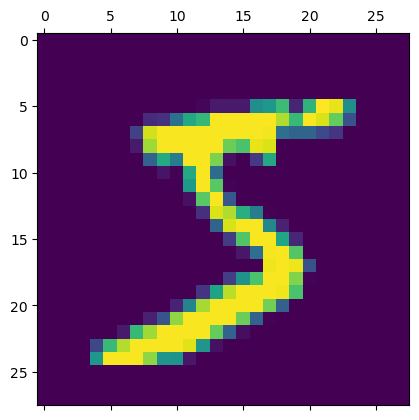

In [98]:
plt.matshow(xtrain[0])

In [100]:
xtrain=xtrain/255
xtest=xtest/255

In [102]:
xtrain_flattend=xtrain.reshape(len(xtrain),28*28)
xtest_flattend=xtest.reshape(len(xtest),28*28)

In [104]:
xtrain_flattend.shape

(60000, 784)

In [108]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 input images
    layers.Dense(100, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(xtrain,ytrain,epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8753 - loss: 0.4511
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9632 - loss: 0.1279
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9758 - loss: 0.0841
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9815 - loss: 0.0622
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9851 - loss: 0.0500


In [109]:
model.evaluate(xtest,ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9722 - loss: 0.0944


[0.07893219590187073, 0.9758999943733215]

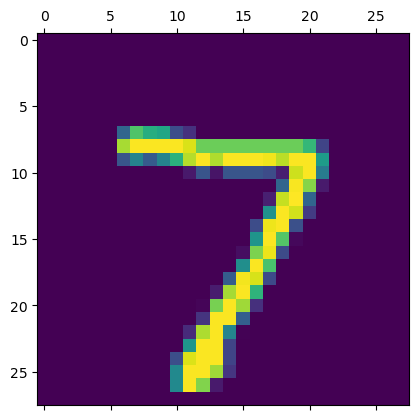

In [136]:
plt.matshow(xtest[0])

In [138]:
ypredict=model.predict(xtest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [140]:
ypredict

array([[8.99396809e-07, 1.83539328e-09, 1.10673882e-05, ...,
        9.99696493e-01, 1.01740348e-07, 6.78514243e-06],
       [8.47120418e-08, 9.65902473e-06, 9.99967575e-01, ...,
        1.31624165e-11, 1.86890938e-05, 1.41194814e-12],
       [5.55233510e-06, 9.97859895e-01, 1.65950099e-04, ...,
        1.27450156e-03, 5.51744946e-04, 2.21302730e-06],
       ...,
       [1.42025827e-11, 1.12859409e-11, 7.01289504e-12, ...,
        8.93420929e-06, 1.09593793e-06, 7.87814060e-05],
       [2.14003421e-07, 3.51584966e-08, 2.96065672e-10, ...,
        7.12677775e-07, 4.81825409e-04, 4.88243623e-09],
       [8.69172879e-07, 1.40497236e-09, 5.35519985e-06, ...,
        2.48900971e-08, 1.37205575e-07, 5.84489168e-09]], dtype=float32)

In [142]:
np.argmax(ypredict[0])

7